# Introduction

This data analysis contains informations abour LEGO colors, LEGO themes, and LEGO set pieces.

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


# Data Exploration

Number of different colors the LEGO company produce. Read the colors.csv file in the data folder and find the total number of unique colours using [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique)

In [12]:
color_df = pd.read_csv('colors.csv')
# color_df
color_df.nunique()

the number of transparent colors where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>.

In [15]:
color_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,184,184,184
t,39,39,39


In [16]:
color_df.is_trans.value_counts()

f    184
t     39
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.


In [17]:
sets_df = pd.read_csv("sets.csv")
# First 5 rows
sets_df.head()
# Last 5 rows
sets_df.tail()

The year of the first LEGO sets released.

In [29]:
# The year
sets_df.year.min()

# Shows first 5 rows for sorted df by the year
sets_df.sort_values('year').head()

,set_num,name,year,theme_id,num_parts,img_url
12973,700.1-1,Extra-Large Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.1-1...
12986,700.2-1,Large Gift Set (ABB),1949,365,178,https://cdn.rebrickable.com/media/sets/700.2-1...
12997,700.A-1,Small Brick Set (ABB),1949,371,24,https://cdn.rebrickable.com/media/sets/700.a-1...
12998,700.B-1,Small Doors and Windows Set (ABB),1949,371,12,https://cdn.rebrickable.com/media/sets/700.b-1...
12991,700.3-1,Medium Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.3-1...


How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [38]:
sets_df[sets_df.year == 1949]

,set_num,name,year,theme_id,num_parts,img_url
12973,700.1-1,Extra-Large Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.1-1...
12986,700.2-1,Large Gift Set (ABB),1949,365,178,https://cdn.rebrickable.com/media/sets/700.2-1...
12991,700.3-1,Medium Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.3-1...
12997,700.A-1,Small Brick Set (ABB),1949,371,24,https://cdn.rebrickable.com/media/sets/700.a-1...
12998,700.B-1,Small Doors and Windows Set (ABB),1949,371,12,https://cdn.rebrickable.com/media/sets/700.b-1...


The top 5 LEGO sets with the most number of parts.

In [33]:
sets_df.sort_values('num_parts', ascending=False)

,set_num,name,year,theme_id,num_parts,img_url
4270,31203-1,World Map,2021,709,11695,https://cdn.rebrickable.com/media/sets/31203-1...
399,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...
20080,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,https://cdn.rebrickable.com/media/sets/bigbox-...
385,10294-1,Titanic,2021,721,9092,https://cdn.rebrickable.com/media/sets/10294-1...
366,10276-1,Colosseum,2020,721,9036,https://cdn.rebrickable.com/media/sets/10276-1...
...,...,...,...,...,...,...
12467,66426-1,City Super Pack 3 in 1,2012,58,0,https://cdn.rebrickable.com/media/sets/66426-1...
12464,66414-1,Super Pack 2 in 1,2012,401,0,https://cdn.rebrickable.com/media/sets/66414-1...
12463,66412-1,City Super Pack 2 in 1,2012,61,0,https://cdn.rebrickable.com/media/sets/66412-1...
12462,66411-1,Super Pack 3 in 1,2012,158,0,https://cdn.rebrickable.com/media/sets/66411-1...


The number of LEGO sets released year-on-year Using <code>.groupby()</code> and <code>.count()</code>.

In [46]:
sets_by_year = sets_df.groupby('year').count()
sets_by_year['set_num']

year
1949       5
1950       6
1953       4
1954      14
1955      39
        ... 
2019    1016
2020    1011
2021    1140
2022     990
2023     650
Name: set_num, Length: 73, dtype: int64

The number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2023, so I had exclude some data from the chart using the slicing.

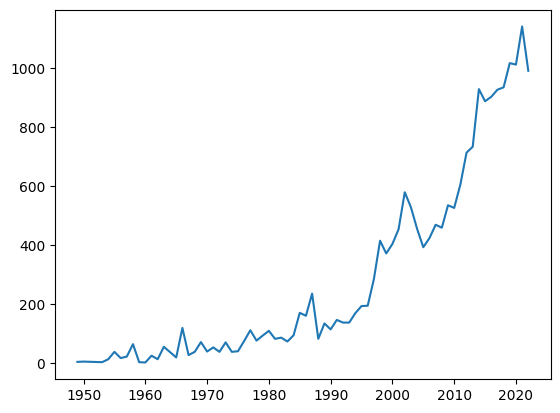

In [49]:
plt.plot(sets_by_year.index[:-1], sets_by_year.set_num[:-1])

### Aggregate Data with the Python .agg() Function

The number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [51]:
themes = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,6
...,...
2019,95
2020,100
2021,93


Plot the number of themes released by year on a line chart. Only include the full calendar years

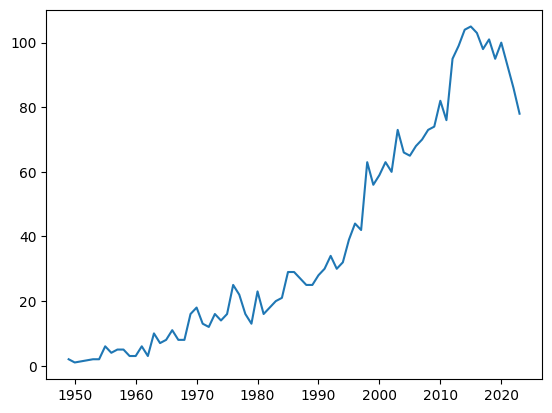

In [53]:
plt.plot(themes.index[:-1], themes.theme_id[:-1])

### Line Charts with Two Seperate Axes

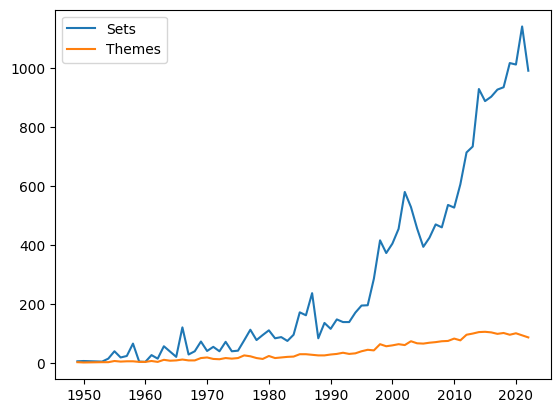

In [56]:
plt.plot(sets_by_year.index[:-1], sets_by_year.set_num[:-1], label="Sets")
plt.plot(themes.index[:-1], themes.theme_id[:-1], label="Themes")
plt.legend()

The average number of parts per set using the <code>.groupby()</code> and <code>.agg()</code>.

In [59]:
ave = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})
ave

,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,12.205128
...,...
2019,189.011811
2020,209.780415
2021,232.871053


### Scatter Plots in Matplotlib

The average number of parts over time using a Matplotlib scatter plot. [scatter plot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

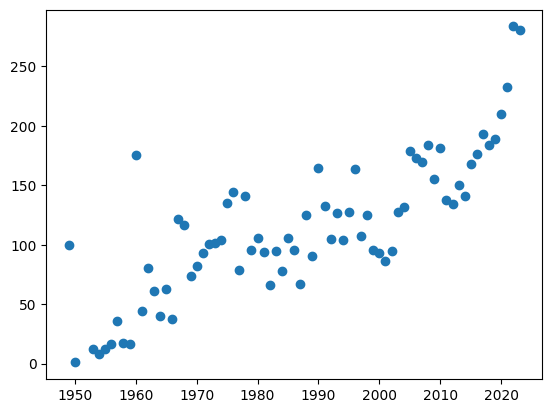

In [60]:
plt.scatter(ave.index, ave.num_parts)

### Number of Sets per LEGO Theme

Theme with the largest number of individual sets.

In [66]:
theme_count = sets_df['theme_id'].value_counts()
theme_count

158    876
503    687
497    636
494    545
501    512
      ... 
411      1
210      1
415      1
307      1
414      1
Name: theme_id, Length: 458, dtype: int64

In [68]:
sets_df[sets_df.theme_id == 158]

,set_num,name,year,theme_id,num_parts,img_url
2097,20006-1,Clone Turbo Tank,2008,158,64,https://cdn.rebrickable.com/media/sets/20006-1...
2108,20007-1,Republic Attack Cruiser,2009,158,84,https://cdn.rebrickable.com/media/sets/20007-1...
2121,20009-1,AT-TE Walker,2009,158,94,https://cdn.rebrickable.com/media/sets/20009-1...
2123,20010-1,Republic Gunship,2009,158,94,https://cdn.rebrickable.com/media/sets/20010-1...
2130,20016-1,Imperial Shuttle,2010,158,70,https://cdn.rebrickable.com/media/sets/20016-1...
...,...,...,...,...,...,...
21261,VP-4,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-4.jpg
21264,VP-8,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-8.jpg
21297,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
21298,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...


### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

Find the corresponding the sets in the sets.csv. (Top 3 themes)

In [69]:
th = pd.read_csv('themes.csv')

In [71]:
th[th.id == 158]

,id,name,parent_id
75,158,Star Wars,NaN


In [73]:
th[th.id == 503]

,id,name,parent_id
251,503,Key Chain,501.0


In [74]:
th[th.id == 497]

,id,name,parent_id
246,497,Books,NaN


### Merging (i.e., Combining) DataFrames based on a Key


In [77]:
theme = pd.DataFrame({'id': theme_count.index,
                      'set_count': theme_count.values})
theme

,id,set_count
0,158,876
1,503,687
2,497,636
3,494,545
4,501,512
...,...,...
453,411,1
454,210,1
455,415,1
456,307,1


In [82]:
merged = pd.merge(theme, th, on='id')
merged

,id,set_count,name,parent_id
0,158,876,Star Wars,NaN
1,503,687,Key Chain,501.0
2,497,636,Books,NaN
3,494,545,Friends,NaN
4,501,512,Gear,NaN
...,...,...,...,...
453,411,1,Legoland,NaN
454,210,1,Belville,207.0
455,415,1,Coast Guard,411.0
456,307,1,Aquazone,NaN


<BarContainer object of 10 artists>

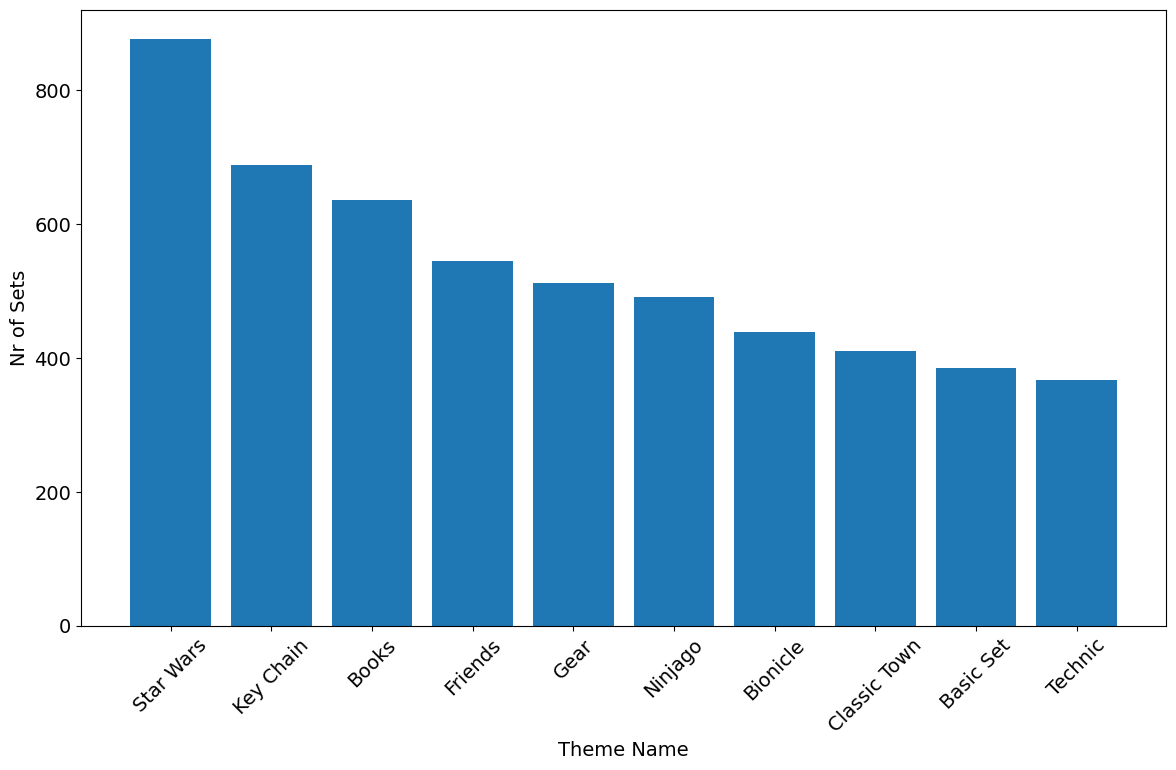

In [87]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged.name[:10], merged.set_count[:10])